In [1]:
import pandas  as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from datetime import timedelta
import tensorflow as tf

In [2]:
df = pd.read_csv('Imputed_m96_Progressor.csv')

In [3]:
df.head(20)

,PTID,VISCODE,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,...,EcogPtDivatt,EcogPtTotal,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,EcogSPTotal,Calculated Diagnosis
0,002_S_0295,bl,0.000000,3.000000,4.000000,1.000000,28.000000,56.000000,5.000000,3.000000,...,0.946487,1.023623,1.135182,1.083713,1.131010,1.016576,0.976817,0.977503,1.054367,CNs
1,002_S_0295,m06,0.000000,5.330000,6.330000,1.000000,28.000000,50.000000,7.000000,2.000000,...,1.011747,1.026511,1.185862,1.006525,1.044206,1.025742,1.021633,1.037495,1.054806,CNs
2,002_S_0295,m12,0.000000,4.670000,5.670000,1.000000,30.000000,53.000000,10.000000,2.000000,...,0.985921,1.025781,1.163892,1.036070,1.064586,1.042524,0.997455,1.026956,1.055454,CNs
3,002_S_0295,m18,0.000000,4.170000,5.670000,1.500000,29.500000,49.000000,8.500000,2.000000,...,0.975817,1.025275,1.163750,1.042146,1.069793,1.051914,0.991613,1.008476,1.055178,CNs
4,002_S_0295,m24,0.000000,3.670000,5.670000,2.000000,29.000000,45.000000,7.000000,2.000000,...,0.963675,1.024709,1.174956,1.048991,1.066163,1.056240,0.980130,0.997897,1.054919,CNs
5,002_S_0295,m30,0.000000,3.670000,6.170000,2.500000,28.500000,44.000000,6.000000,2.000000,...,0.985731,1.025662,1.177280,1.031836,1.056488,1.042946,0.997961,1.011810,1.054654,CNs
6,002_S_0295,m36,0.000000,3.670000,6.670000,3.000000,28.000000,43.000000,5.000000,2.000000,...,1.005957,1.026588,1.195172,1.009234,1.037116,1.026711,1.013109,1.036863,1.054416,CNs
7,002_S_0295,m42,0.000000,4.335000,7.335000,3.000000,27.000000,47.000000,5.500000,2.000000,...,0.975824,1.025313,1.188130,1.028140,1.060089,1.049008,0.987414,1.007022,1.053775,CNs
8,002_S_0295,m48,0.000000,5.000000,8.000000,3.000000,26.000000,51.000000,6.000000,2.000000,...,0.945691,1.024038,1.181087,1.047046,1.083062,1.071304,0.961720,0.977182,1.053134,CNs
9,002_S_0295,m54,0.000000,5.500000,8.500000,3.000000,27.000000,40.500000,5.000000,2.500000,...,1.003295,1.026232,1.210807,0.997378,1.031764,1.031047,1.015935,1.026121,1.053679,CNs


In [4]:
df.columns

Index(['PTID', 'VISCODE', 'CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE',
       'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting',
       'RAVLT_perc_forgetting', 'LDELTOTAL', 'DIGITSCOR', 'TRABSCOR', 'FAQ',
       'mPACCdigit', 'mPACCtrailsB', 'MOCA', 'EcogPtMem', 'EcogPtLang',
       'EcogPtVisspat', 'EcogPtPlan', 'EcogPtOrgan', 'EcogPtDivatt',
       'EcogPtTotal', 'EcogSPMem', 'EcogSPLang', 'EcogSPVisspat', 'EcogSPPlan',
       'EcogSPOrgan', 'EcogSPDivatt', 'EcogSPTotal', 'Calculated Diagnosis'],
      dtype='object')

In [5]:
# Drop all columns except the specified ones
df_cleaned = df[['VISCODE', 'CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE',
                 'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting', 
                 'RAVLT_perc_forgetting', 'LDELTOTAL', 'DIGITSCOR', 
                 'TRABSCOR', 'FAQ', 'mPACCdigit', 'mPACCtrailsB','PTID','Calculated Diagnosis']]

# Display the cleaned dataframe
print(df_cleaned.head())


  VISCODE  CDRSB  ADAS11  ADAS13  ADASQ4  MMSE  RAVLT_immediate  \
0      bl    0.0    3.00    4.00     1.0  28.0             56.0   
1     m06    0.0    5.33    6.33     1.0  28.0             50.0   
2     m12    0.0    4.67    5.67     1.0  30.0             53.0   
3     m18    0.0    4.17    5.67     1.5  29.5             49.0   
4     m24    0.0    3.67    5.67     2.0  29.0             45.0   

   RAVLT_learning  RAVLT_forgetting  RAVLT_perc_forgetting  LDELTOTAL  \
0             5.0               3.0                23.0769       12.0   
1             7.0               2.0                16.6667       13.5   
2            10.0               2.0                14.2857       15.0   
3             8.5               2.0                15.4762       12.5   
4             7.0               2.0                16.6667       10.0   

   DIGITSCOR  TRABSCOR  FAQ  mPACCdigit  mPACCtrailsB        PTID  \
0       48.0     300.0  0.0   -0.110553     -3.635890  002_S_0295   
1       43.0      68

In [6]:
df =df_cleaned

In [7]:
def viscode_to_months(viscode):
    if viscode == 'bl':
        return 0
    elif viscode.startswith('m'):
        return int(viscode[1:])  # Convert 'mXX' to number of months
    
df['Months'] = df['VISCODE'].apply(viscode_to_months)

# Step 2: Sort the data by Patient ID and Months
df = df.sort_values(by=['PTID', 'Months'])
viscode_index = df.columns.get_loc('VISCODE')

# Insert 'Months' column at the position right after 'VISCODE'
df.insert(viscode_index + 1, 'Months', df.pop('Months'))


In [8]:
df

,VISCODE,Months,CDRSB,ADAS11,ADAS13,ADASQ4,MMSE,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,LDELTOTAL,DIGITSCOR,TRABSCOR,FAQ,mPACCdigit,mPACCtrailsB,PTID,Calculated Diagnosis
0,bl,0,0.000000,3.000000,4.000000,1.000000,28.000000,56.000000,5.000000,3.000000,23.076900,12.000000,48.000000,300.000000,0.000000,-0.110553,-3.635890,002_S_0295,CNs
1,m06,6,0.000000,5.330000,6.330000,1.000000,28.000000,50.000000,7.000000,2.000000,16.666700,13.500000,43.000000,68.000000,0.000000,-0.294118,0.367504,002_S_0295,CNs
2,m12,12,0.000000,4.670000,5.670000,1.000000,30.000000,53.000000,10.000000,2.000000,14.285700,15.000000,54.000000,72.000000,0.000000,3.122910,2.405730,002_S_0295,CNs
3,m18,18,0.000000,4.170000,5.670000,1.500000,29.500000,49.000000,8.500000,2.000000,15.476200,12.500000,53.500000,96.000000,0.000000,1.609341,0.335430,002_S_0295,CNs
4,m24,24,0.000000,3.670000,5.670000,2.000000,29.000000,45.000000,7.000000,2.000000,16.666700,10.000000,53.000000,120.000000,0.000000,0.095772,-1.734870,002_S_0295,CNs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30578,m72,72,0.997617,10.509164,16.352609,5.761848,26.198423,34.653974,4.779806,6.344202,67.050994,6.703816,14.045637,252.485254,2.807199,-6.633953,-9.270191,941_S_6803,MCIs
30579,m78,78,0.867200,6.716921,9.177599,2.947717,29.620267,37.521772,3.109639,2.706481,28.476376,10.278041,54.165454,63.222534,4.171913,-4.461152,-4.092994,941_S_6803,MCIs
30580,m84,84,2.760001,10.249716,16.054889,7.850159,29.350465,33.865883,0.538609,3.660119,56.386614,7.655762,-2.246390,235.733710,4.877526,-7.137243,-7.113859,941_S_6803,MCIs
30581,m90,90,0.754309,10.511876,9.475303,3.253254,29.461123,41.040897,2.411145,2.910998,56.771089,22.431820,35.606372,121.576401,3.452354,1.292503,-0.888749,941_S_6803,MCIs


In [9]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Ensure 'Months' column is correctly positioned
# viscode_index = df.columns.get_loc('VISCODE')
# df.insert(viscode_index + 1, 'Months', df.pop('Months'))

# # Filter the DataFrame for the specific patient
# patient_df = df[df['PTID'] == '002_S_0413']

# # Plot each feature with respect to 'Months' for the specific patient
# features = patient_df.columns.difference(['Months', 'VISCODE', 'PTID'])

# for feature in features:
#     plt.figure()
#     plt.plot(patient_df['Months'], patient_df[feature], marker='o')
#     plt.title(f'{feature} over Months for patient 002_S_0413	')
#     plt.xlabel('Months')
#     plt.ylabel(feature)
#     plt.grid(True)
#     plt.show()

In [10]:
df['Calculated Diagnosis'].value_counts()

Calculated Diagnosis
CNs     11237
MCIs     9622
MCIp     6358
CNp      3366
Name: count, dtype: int64

In [11]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Define the mapping for 'Calculated Diagnosis'
# diagnosis_mapping = {
#     'CNs': 1,
#     'MCIs': 2,
#     'MCIp': 3,
#     'CNp': 4
# }

# # Ensure 'Months' column is correctly positioned
# viscode_index = df.columns.get_loc('VISCODE')
# df.insert(viscode_index + 1, 'Months', df.pop('Months'))


# # Apply the mapping to the 'Calculated Diagnosis' column
# df['Calculated Diagnosis'] = patient_df['Calculated Diagnosis'].map(diagnosis_mapping)

# # Plot each feature with respect to 'Months' for the specific patient
# features = patient_df.columns.difference(['Months', 'VISCODE', 'PTID'])

# for feature in features:
#     plt.figure()
#     plt.plot(patient_df['Months'], patient_df[feature], marker='o')
#     plt.title(f'{feature} over Months for patient 002_S_0295')
#     plt.xlabel('Months')
#     plt.ylabel(feature)
#     plt.grid(True)
#     plt.show()

In [12]:
df = df.drop(columns=['VISCODE'])

In [13]:
df.columns

Index(['Months', 'CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE',
       'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting',
       'RAVLT_perc_forgetting', 'LDELTOTAL', 'DIGITSCOR', 'TRABSCOR', 'FAQ',
       'mPACCdigit', 'mPACCtrailsB', 'PTID', 'Calculated Diagnosis'],
      dtype='object')

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

# Assuming df is your DataFrame

# Separate features (X) and target (Y), excluding PTID from features
X = df.drop(columns=['Calculated Diagnosis', 'PTID'])  # Features
Y = df['Calculated Diagnosis']  # Target

# Perform Label Encoding on Y (target variable)
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)  # Apply label encoding

# Check the unique classes and shape of Y_encoded
print(f"Unique classes: {np.unique(Y_encoded)}")
print(f"Y_encoded shape: {Y_encoded.shape}")

# One-hot encode the labels
Y_one_hot = to_categorical(Y_encoded)  # Convert to one-hot encoding

# Extract unique PTIDs
unique_ptids = df['PTID'].unique()

# Split PTIDs into train, validation, and test sets
train_ptids, test_ptids = train_test_split(unique_ptids, test_size=0.3, random_state=42)
val_ptids, test_ptids = train_test_split(test_ptids, test_size=0.5, random_state=42)  # 15% validation, 15% test

# Create data subsets based on the split PTIDs
X_train = X[df['PTID'].isin(train_ptids)]
Y_train = Y_one_hot[df['PTID'].isin(train_ptids)]

X_val = X[df['PTID'].isin(val_ptids)]
Y_val = Y_one_hot[df['PTID'].isin(val_ptids)]

X_test = X[df['PTID'].isin(test_ptids)]
Y_test = Y_one_hot[df['PTID'].isin(test_ptids)]

# Check the number of patients in each split
print(f"Train data size: {len(train_ptids)} patients")
print(f"Validation data size: {len(val_ptids)} patients")
print(f"Test data size: {len(test_ptids)} patients")

# Check for NaN values and convert to float if necessary
X_train = X_train.fillna(0).astype(np.float32)  # Fill NaNs and convert to float32
X_val = X_val.fillna(0).astype(np.float32)
X_test = X_test.fillna(0).astype(np.float32)

# Reshape for LSTM (if applicable)
X_train = np.expand_dims(X_train.values, axis=1)  # Shape: (samples, time_steps=1, features)
X_val = np.expand_dims(X_val.values, axis=1)
X_test = np.expand_dims(X_test.values, axis=1)



Unique classes: [0 1 2 3]
Y_encoded shape: (30583,)
Train data size: 1259 patients
Validation data size: 270 patients
Test data size: 270 patients


In [15]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

# # Assuming df is your DataFrame

# # Separate features (X) and target (Y), excluding PTID from features
# X = df.drop(columns=['Calculated Diagnosis', 'PTID'])  # Features
# Y = df['Calculated Diagnosis']  # Target

# # Perform Label Encoding on Y (target variable)
# label_encoder = LabelEncoder()
# Y_encoded = label_encoder.fit_transform(Y)  # Apply label encoding




In [16]:
# Y_encoded.dtype

In [17]:
# # Extract unique PTIDs
# unique_ptids = df['PTID'].unique()

# # Split PTIDs into train, validation, and test sets
# train_ptids, test_ptids = train_test_split(unique_ptids, test_size=0.3, random_state=42)
# val_ptids, test_ptids = train_test_split(test_ptids, test_size=0.5, random_state=42)  # 15% validation, 15% test

# # Create data subsets based on the split PTIDs
# X_train = X[df['PTID'].isin(train_ptids)]
# Y_train = Y_encoded[df['PTID'].isin(train_ptids)]

# X_val = X[df['PTID'].isin(val_ptids)]
# Y_val = Y_encoded[df['PTID'].isin(val_ptids)]

# X_test = X[df['PTID'].isin(test_ptids)]
# Y_test = Y_encoded[df['PTID'].isin(test_ptids)]

# # Check the number of patients in each split
# print(f"Train data size: {len(train_ptids)} patients")
# print(f"Validation data size: {len(val_ptids)} patients")
# print(f"Test data size: {len(test_ptids)} patients")

# # Optionally, to check the label encoding mapping:
# print(f"Label encoding classes: {label_encoder.classes_}")

# # Check for NaN values and convert to float if necessary
# print(f"NaN values in X_train: {X_train.isna().sum().sum()}")
# X_train = X_train.fillna(0).astype(np.float32)  # Fill NaNs and convert to float32

In [18]:
Y_test.shape

(4590, 4)

In [19]:
df.isnull().sum()

Months                   0
CDRSB                    0
ADAS11                   0
ADAS13                   0
ADASQ4                   0
MMSE                     0
RAVLT_immediate          0
RAVLT_learning           0
RAVLT_forgetting         0
RAVLT_perc_forgetting    0
LDELTOTAL                0
DIGITSCOR                0
TRABSCOR                 0
FAQ                      0
mPACCdigit               0
mPACCtrailsB             0
PTID                     0
Calculated Diagnosis     0
dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,LSTM, Dense

In [21]:
# X_train = np.expand_dims(X_train, axis=1)  # Adding time_steps dimension as 1
# X_test = np.expand_dims(X_test, axis=1)


In [22]:
Y_encoded

array([1, 1, 1, ..., 3, 3, 3])

In [23]:
# Check unique classes
num_classes = len(np.unique(Y_encoded))  # Should match your expected number of classes
num_classes

4

In [24]:
model = Sequential()


In [25]:
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Specify input shape based on your X_train
model.add(LSTM(units=50, return_sequences=True))  # First LSTM layer
model.add(LSTM(units=50))  # Second LSTM layer

# Output layer for classification (number of classes = number of unique Y_train labels)
model.add(Dense(units=num_classes, activation='softmax'))  # Make sure this matches the number of classes


In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [27]:
# # After creating X_train as a NumPy array, perform the following checks:

# # Check if there are any NaN values
# nan_count = np.isnan(X_train).sum()
# print(f"Number of NaN values in X_train: {nan_count}")

# # Check the data type of X_train
# print(f"Data type of X_train: {X_train.dtype}")

# # If you need to see the shape of the array:
# print(f"Shape of X_train: {X_train.shape}")


In [28]:
history = model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/30
669/669 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6439 - loss: 0.9264 - val_accuracy: 0.7429 - val_loss: 0.6698
Epoch 2/30
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7221 - loss: 0.7113 - val_accuracy: 0.7623 - val_loss: 0.6191
Epoch 3/30
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7401 - loss: 0.6684 - val_accuracy: 0.7693 - val_loss: 0.5911
Epoch 4/30
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7488 - loss: 0.6439 - val_accuracy: 0.7736 - val_loss: 0.5837
Epoch 5/30
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7588 - loss: 0.6242 - val_accuracy: 0.7710 - val_loss: 0.5730
Epoch 6/30
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7569 - loss: 0.6266 - val_accuracy: 0.7730 - val_loss: 0.5797
Epoch 7/30
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7589 - loss: 0.6202 - val_accuracy: 0.7741 - val_loss: 0.5780
Epoch 8/30
669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7539 - loss: 0.6263 - val_accuracy: 0.

In [29]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.7924 - loss: 0.5204
Test Loss: 0.5509624481201172
Test Accuracy: 0.7851851582527161


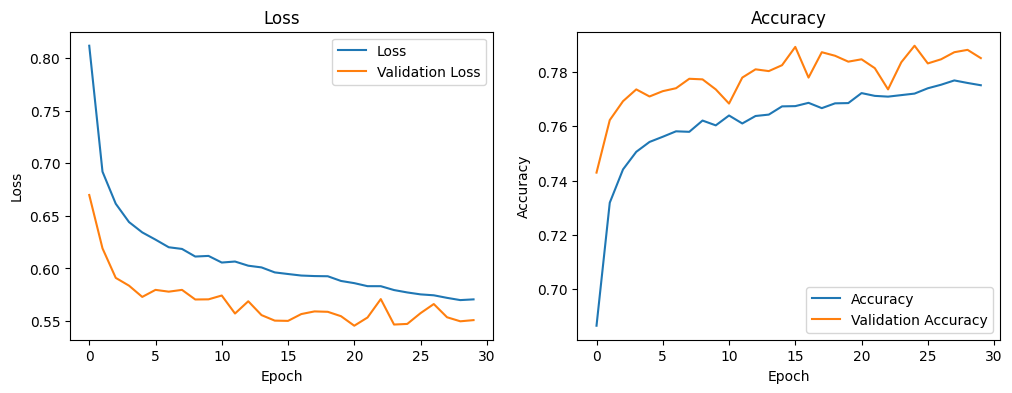

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [31]:
from sklearn.metrics import f1_score

# Predict the classes for the test set
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true_classes = np.argmax(Y_test, axis=1)

# Calculate the F1 score
f1 = f1_score(Y_true_classes, Y_pred_classes, average='weighted')
print(f'F1 Score: {f1}')

144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1 Score: 0.7450140744935928


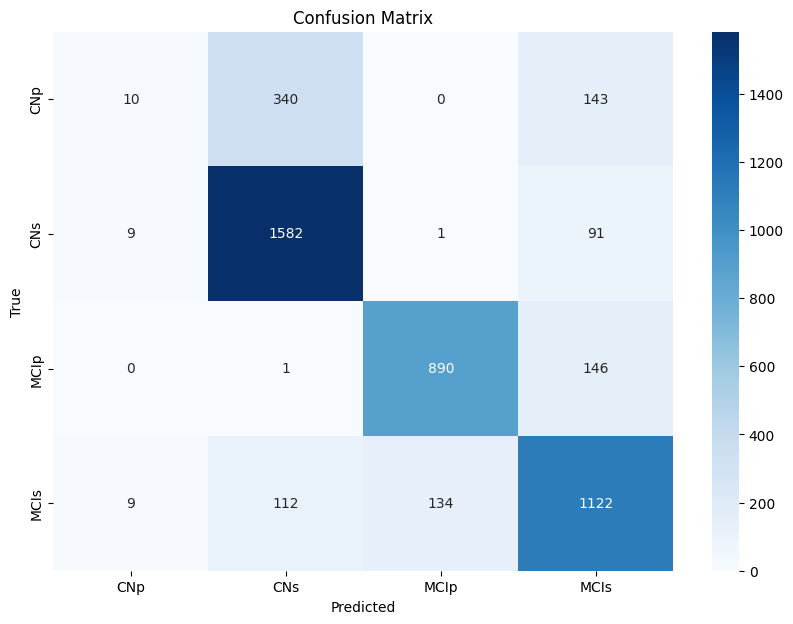

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_true_classes, Y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# pip install xgboost


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [35]:
# No need for reshaping the data for Decision Tree, Random Forest, or XGBoost
X_train = X_train.squeeze()  # Remove extra dimension if added for LSTM
X_val = X_val.squeeze()
X_test = X_test.squeeze()

# The target variable (Y_train, Y_val, Y_test) should be in its original label-encoded form (not one-hot encoded)
Y_train_labels = np.argmax(Y_train, axis=1)  # Convert one-hot back to label encoding
Y_val_labels = np.argmax(Y_val, axis=1)
Y_test_labels = np.argmax(Y_test, axis=1)


In [36]:
# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, Y_train_labels)

# Make predictions on the test set
dt_predictions = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(Y_test_labels, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(classification_report(Y_test_labels, dt_predictions))


Decision Tree Accuracy: 0.7196078431372549
              precision    recall  f1-score   support

           0       0.28      0.29      0.29       493
           1       0.80      0.81      0.80      1683
           2       0.83      0.81      0.82      1037
           3       0.70      0.70      0.70      1377

    accuracy                           0.72      4590
   macro avg       0.65      0.65      0.65      4590
weighted avg       0.72      0.72      0.72      4590



In [37]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, Y_train_labels)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(Y_test_labels, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")
print(classification_report(Y_test_labels, rf_predictions))


Random Forest Accuracy: 0.8041394335511982
              precision    recall  f1-score   support

           0       0.48      0.09      0.15       493
           1       0.81      0.93      0.86      1683
           2       0.90      0.87      0.89      1037
           3       0.76      0.86      0.81      1377

    accuracy                           0.80      4590
   macro avg       0.74      0.69      0.68      4590
weighted avg       0.78      0.80      0.77      4590



In [45]:
params = {
    'objective': 'multi:softmax',  # for multi-class classification
    'num_class': 10,                # number of classes
    'eval_metric': 'mlogloss',      # evaluation metric
    'eta': 0.3,                     # learning rate
    'max_depth': 6,                 # maximum depth of a tree
    'subsample': 0.8,               # fraction of samples used for training trees
    'colsample_bytree': 0.8,        # fraction of features used for training trees
    'n_estimators': 500             # number of boosting rounds (epochs)
}

# Create and train the XGBoost classifier
xgb_model = xgb.XGBClassifier(**params)

In [46]:

# Train the model
xgb_model.fit(X_train, Y_train_labels)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(Y_test_labels, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy}")
print(classification_report(Y_test_labels, xgb_predictions))


XGBoost Accuracy: 0.8080610021786493
              precision    recall  f1-score   support

           0       0.51      0.26      0.35       493
           1       0.83      0.92      0.87      1683
           2       0.90      0.85      0.87      1037
           3       0.78      0.84      0.81      1377

    accuracy                           0.81      4590
   macro avg       0.75      0.72      0.72      4590
weighted avg       0.79      0.81      0.80      4590



In [48]:
# Confusion Matrix for Random Forest
rf_confusion_matrix = confusion_matrix(Y_test_labels, rf_predictions)

# Confusion Matrix for XGBoost
xgb_confusion_matrix = confusion_matrix(Y_test_labels, xgb_predictions)


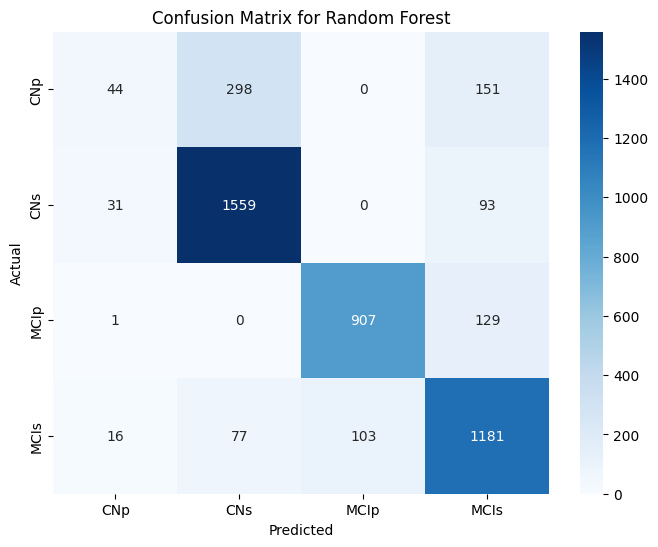

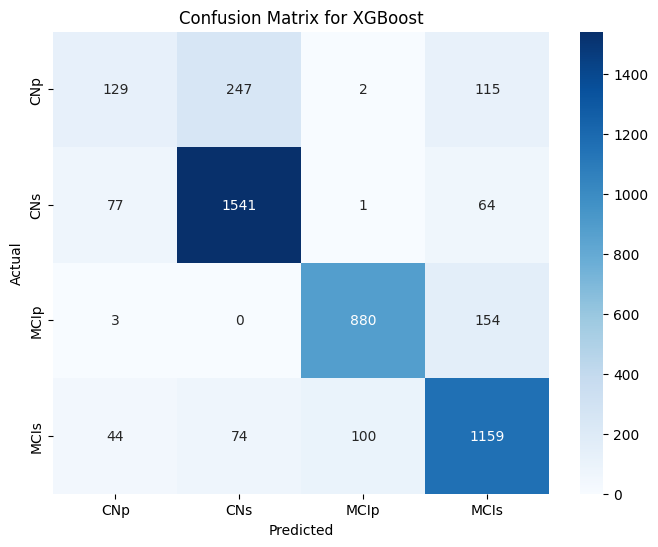

In [49]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Class names (labels)
class_names = label_encoder.classes_

# Plotting Confusion Matrices
plot_confusion_matrix(rf_confusion_matrix, class_names, "Random Forest")
plot_confusion_matrix(xgb_confusion_matrix, class_names, "XGBoost")


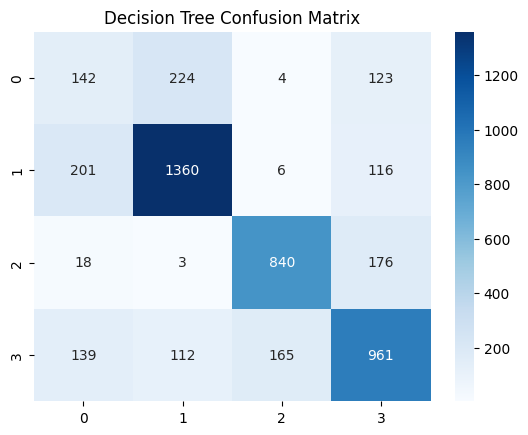

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for Decision Tree
dt_cm = confusion_matrix(Y_test_labels, dt_predictions)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Similarly, you can plot for Random Forest and XGBoost
